In [1]:
# Import required packages
%cd /Users/namir_oues/Documents/PhD/MDSubSampler
import mdss.protein_data as prot
import mdss.geometrical_property as gp
import mdss.sampler as s
import mdss.dissimilarity as d
import tempfile
from IPython.display import Image, display
import os

/Users/namir_oues/Documents/PhD/MDSubSampler


/Users/namir_oues/Library/Caches/pypoetry/virtualenvs/mdsubsampler-zr_osNU_-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# set paths and all required arguments 
trajectory_file = "data/input.xtc"
topology_file = "data/input.gro"
size_list = [0.25, 0.5, 1.0, 2.5, 5.0, 10.0, 20.0, 25.0, 50.0]
atom_selection= "name CA"
dissimilarity_measure = d.Bhattacharyya
# set a temporary directory to save all output files 
temp_dir = tempfile.mkdtemp()

In [3]:
# create a protein data object
p_data = prot.ProteinData(trajectory_file,topology_file,config_parameters=None)

In [4]:
# create a protein property object
p_property = gp.RMSD(p_data, atom_selection, fit=True)

In [5]:
# calculate reference property for full trajectory
p_property.calculate_property()

In [11]:
# create random sampler object 
sampler = s.RandomSampler(
            protein_property=p_property,
            protein_data=p_data,
            seed_number=1999,
            output_folder=temp_dir,
            file_prefix='sc1',
            dissimilarity_measure=dissimilarity_measure,
        )

In [12]:
# create trajectories for all sample sizes from the list provided
sampled_property = sampler.scan_sample_size(
            perc_vector=size_list,
            dissimilarity_threshold=None,
            step_recording = True
        )

<Figure size 640x480 with 0 Axes>

In [14]:
# check the output files generated in the temporary directory 
print(os.listdir(temp_dir))

['sc1_50_0_RMSD.xtc', 'scen1_20_0_RMSD.xtc', 'scen1_0_5_RMSD.dat', 'sc1_0_5_RMSD.dat', 'scen1_50_0_RMSD.dat', 'sc1_20_0_RMSD.dat', 'sc1_5_0_RMSD.xtc', 'scen1_5_0_RMSD.xtc', 'scen1_10_0_RMSD.npy', 'sc1_0_5_RMSD_plot.png', 'scen1_25_0_RMSD.xtc', 'sc1_5_0_RMSD_plot.png', 'sc1_25_0_RMSD.dat', 'scen1_0_25_RMSD.npy', 'scen1_2_5_RMSD_plot.png', 'sc1_2_5_RMSD.dat', 'scen1_10_0_RMSD_plot.png', 'scen1_5_0_RMSD.npy', 'sc1_25_0_RMSD_plot.png', 'scen1_2_5_RMSD.dat', 'sc1_5_0_RMSD.npy', 'sc1_50_0_RMSD_plot.png', 'sc1_50_0_RMSD.npy', 'scen1_20_0_RMSD.npy', 'scen1_0_25_RMSD.xtc', 'scen1_25_0_RMSD_plot.png', 'scen1_25_0_RMSD.npy', 'sc1_0_25_RMSD.dat', 'sc1_10_0_RMSD_plot.png', 'sc1_10_0_RMSD.dat', 'scen1_1_0_RMSD.dat', 'scen1_1_0_RMSD_plot.png', 'scen1_50_0_RMSD_plot.png', 'sc1_1_0_RMSD.dat', 'scen1_10_0_RMSD.xtc', 'sc1_1_0_RMSD.xtc', 'scen1_10_0_RMSD.dat', 'scen1_1_0_RMSD.xtc', 'sc1_10_0_RMSD.xtc', 'scen1_20_0_RMSD_plot.png', 'sc1_0_25_RMSD_plot.png', 'sc1_0_25_RMSD.xtc', 'sc1_25_0_RMSD.npy', 'scen1_0

sc1_0_5_RMSD_plot.png


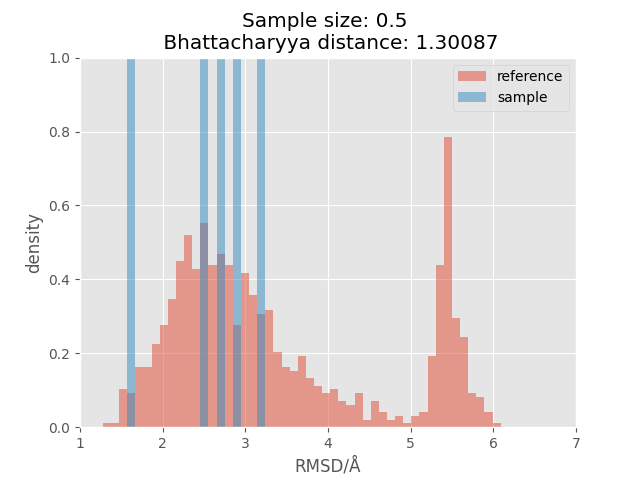

sc1_5_0_RMSD_plot.png


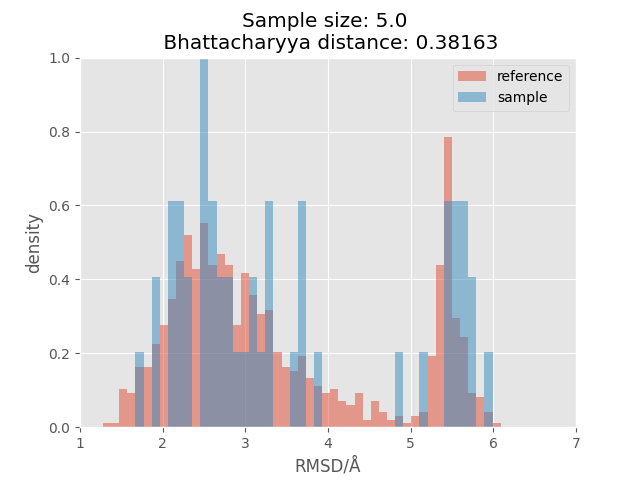

scen1_2_5_RMSD_plot.png


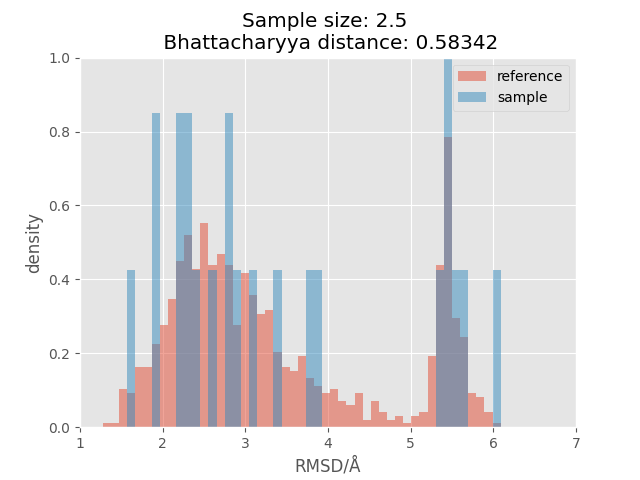

scen1_10_0_RMSD_plot.png


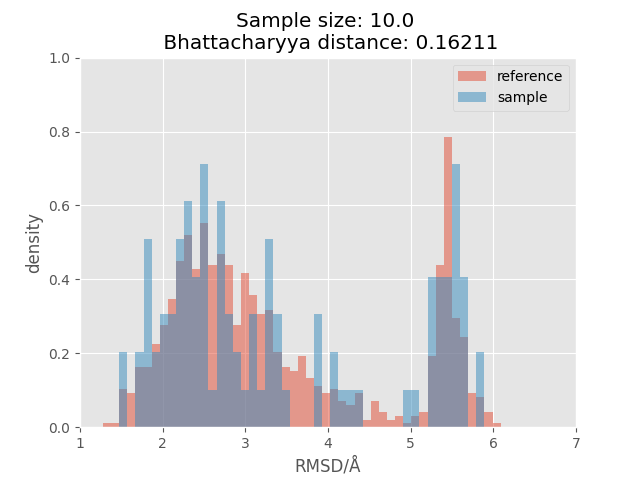

sc1_25_0_RMSD_plot.png


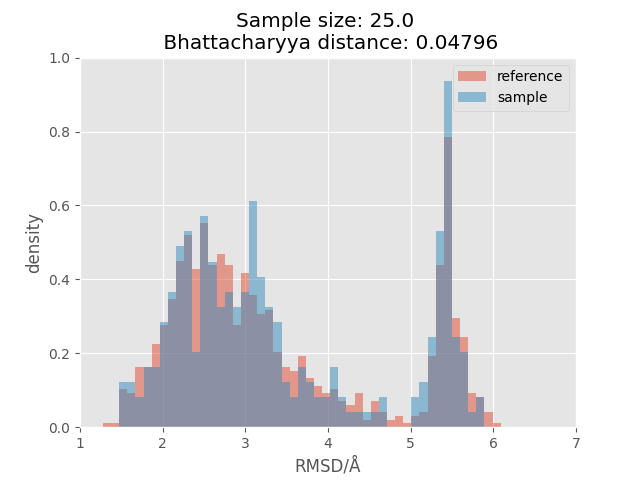

sc1_50_0_RMSD_plot.png


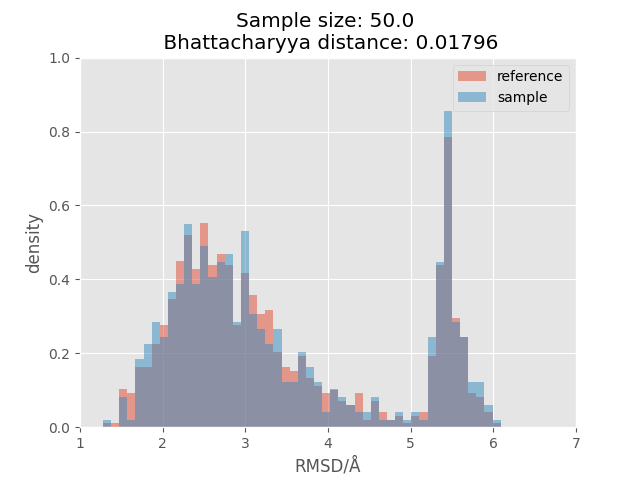

scen1_25_0_RMSD_plot.png


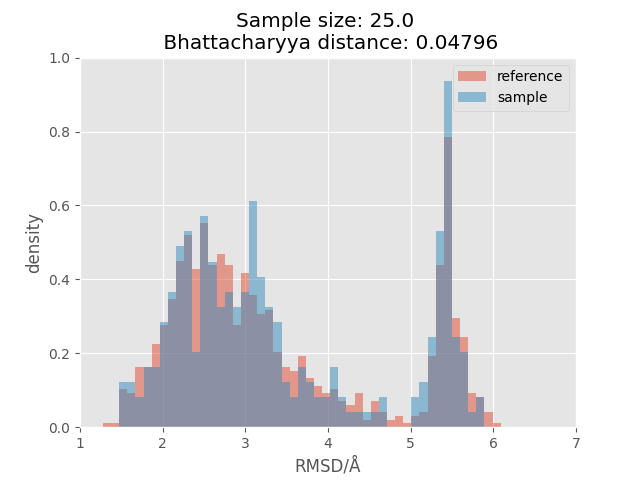

sc1_10_0_RMSD_plot.png


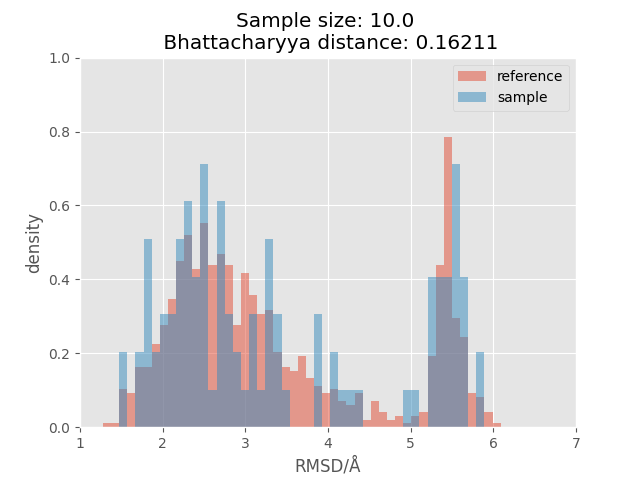

scen1_1_0_RMSD_plot.png


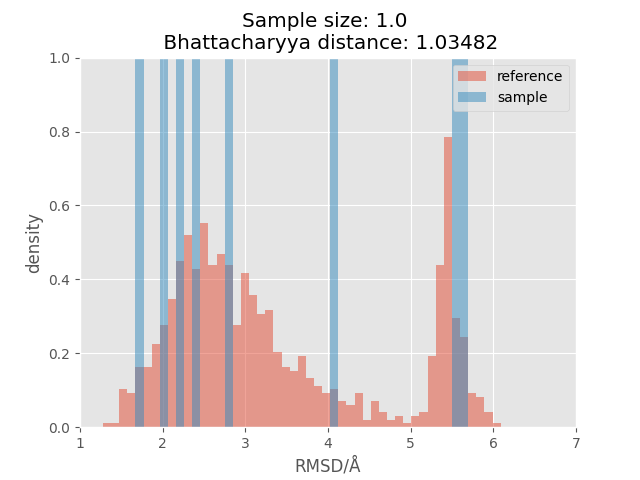

scen1_50_0_RMSD_plot.png


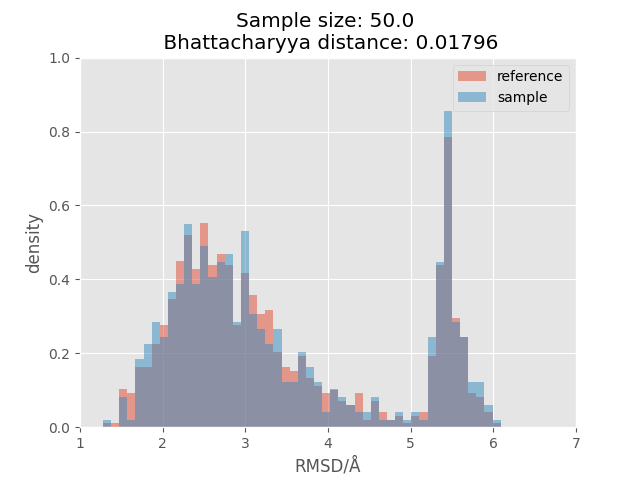

scen1_20_0_RMSD_plot.png


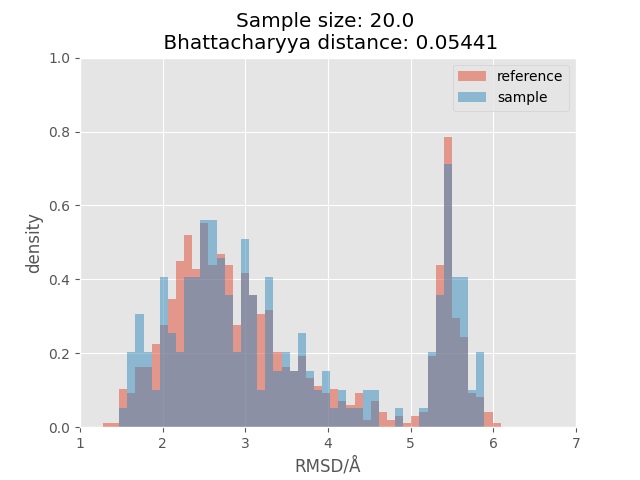

sc1_0_25_RMSD_plot.png


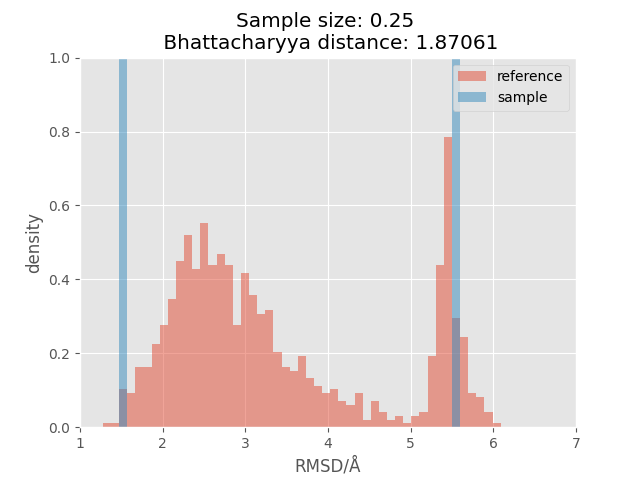

sc1_1_0_RMSD_plot.png


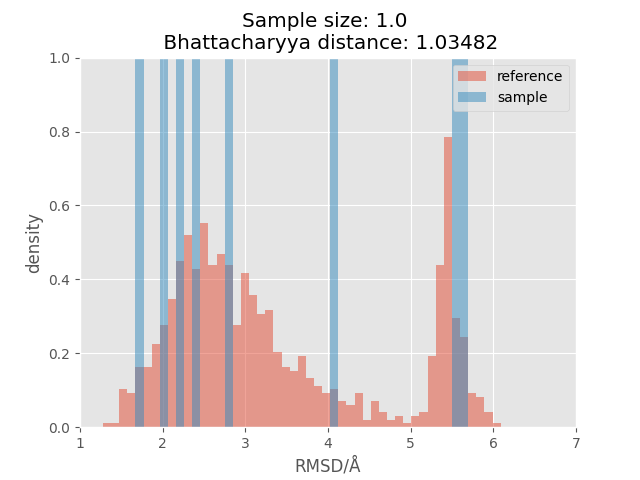

sc1_20_0_RMSD_plot.png


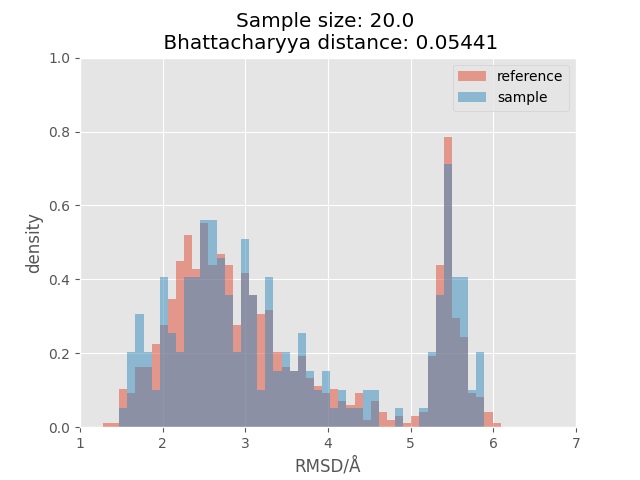

scen1_0_25_RMSD_plot.png


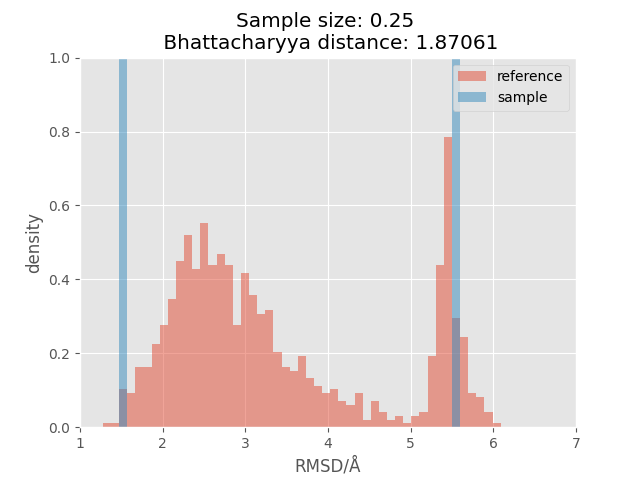

sc1_2_5_RMSD_plot.png


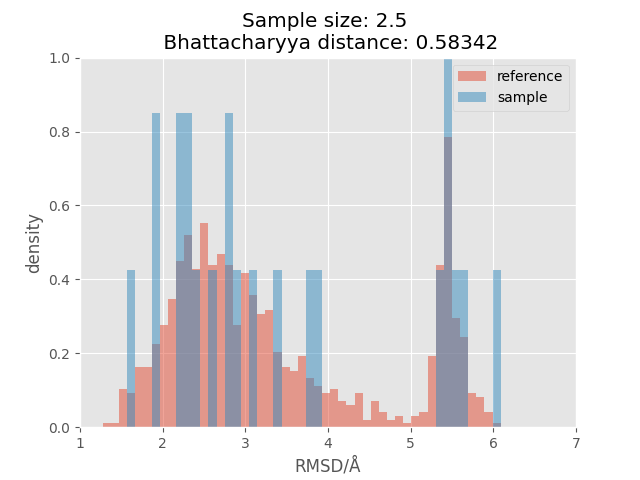

scen1_5_0_RMSD_plot.png


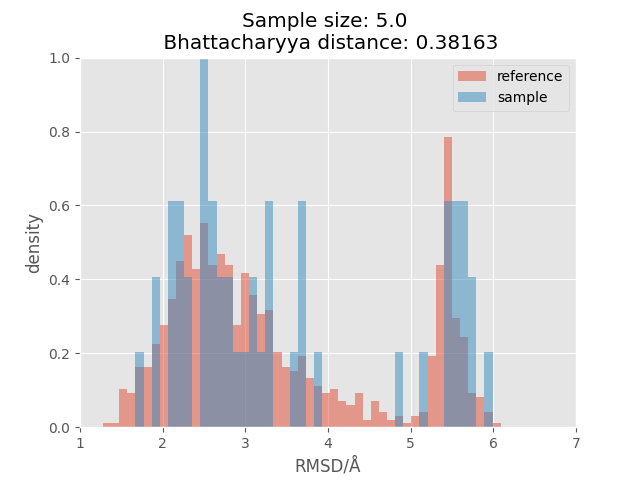

scen1_0_5_RMSD_plot.png


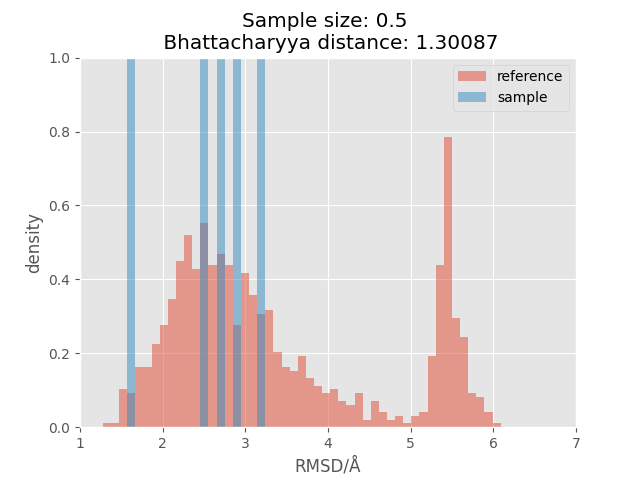

In [13]:
# display all distribution plots for all sample sizes 
for fname in (os.listdir(temp_dir)):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.png':
        print(fname)
        display(Image(filename=fpath))

In [ ]:
# display tables with calculated property for all different sample sizes
for fname in os.listdir(temp_dir):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.dat':
            with open(fpath, 'r') as file:
                contents = file.read()
                print(fname)
                print('-----------------------')
                print(contents)  
                print('-----------------------')